In [1]:
import skopt
from smallCombinerBigMagnets import *
import time
func,lattice=compute_Sol(1e-5,25,50)

here
SOMETHING DOES NOT MAKE SENSE HERE. This needs to follow the same rules as when in the lattice.
SOMETHING DOES NOT MAKE SENSE HERE. This needs to follow the same rules as when in the lattice.
0.5857477040170712 2.969059875129798
look at q hull documentation to  figure out what arguments to use


array(nan)

In [6]:
import skopt
from SwarmTracer import SwarmTracer
from ParaWell import ParaWell
from SwarmTracer import SwarmTracer
swarmTracer=SwarmTracer(lattice)
swarmInitial=swarmTracer.initalize_Random_Swarm_In_Phase_Space(3e-3,3e-3,1.0,5.0,5.0,100)
funcList=[]

np.random.seed(42)
sampler=skopt.sampler.Sobol()
argsBounds=[(.15,.25),(.5,1.5),(-.1,.1)]
num=50
samplesArr=np.asarray(sampler.generate(argsBounds,num))

swarmTracer.inject_Swarm()



In [5]:
# from SwarmTracer import SwarmTracer
# swarmTracer=SwarmTracer(lattice)
# swarmNew=swarmTracer.initialize_Swarm_At_Combiner_Output(.15,1.0,0.0,labFrame=False,numPhaseSpace=10000)
# t=time.time()
# test=[]
# for particle in swarmNew:
#     if particle.clipped==False:
#         q=particle.q[1:]
#         p=particle.p
#         Xi=np.append(q,p)
#         test.append(func(*Xi))
# print(np.nanmean(np.asarray(test)))
# print(time.time()-t)

0.8941187161227978
0.23909616470336914


In [2]:
from SwarmTracer import SwarmTracer
import scipy.optimize as spo
swarmTracer=SwarmTracer(lattice)
def mode_Match(swarm,mode_Func):
    temp=[]
    for particle in swarm:
        if particle.clipped==False:
            q=particle.q[1:]
            p=particle.p
            Xi=np.append(q,p)
            temp.append(mode_Func(*Xi))
    temp=np.asarray(temp)
    return np.nansum(temp),np.nanmax(temp),np.nanmean(temp),np.sum(~np.isnan(temp))
def inject(args):
    Lo,Li,LOffset=args
    swarmNew=swarmTracer.initialize_Swarm_At_Combiner_Output(Lo,Li,LOffset,labFrame=False,numParticles=1000)
    meanRevs=mode_Match(swarmNew,func)
    return meanRevs
temp=[]
def minimize(args):
    temp.append(0)
    print(args)
    val=inject(args)[0]
    return -val
#t=time.time()

#inject(.15,1.0,0.0) #0.8941187161227978
bounds=[(.15,.25),(.5,1.5),(-.1,.1)]
sol=spo.differential_evolution(minimize,bounds,maxiter=50,workers=-1,polish=False,disp=True,popsize=32)
#sol

/home/billy/.local/lib/python3.8/site-packages/scipy/optimize/_differentialevolution.py:495: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  warnings.warn("differential_evolution: the 'workers' keyword has"


[ 0.16168152  1.22650737 -0.0614063 ][0.16977219 1.32351073 0.02072942][0.20098563 0.72921738 0.04655581]

[ 0.1848799   1.36658219 -0.03782864]
[ 0.19651048  1.31924285 -0.00964644]

[ 0.2352836   1.23699516 -0.06487952][0.21309478 1.18194707 0.0062793 ][0.22443847 1.21801796 0.02900545][ 0.20402011  1.3817397  -0.00471599]
[ 0.15197177  1.43621297 -0.02846313]



In [13]:
#x: array([ 0.2495042 ,  0.75080664, -0.07861526])

In [40]:
inject(sol.x-1e-3)

(519.4766784525032, 10.56630982271778, 0.887994322141031, 585)

array([ 0.24976686,  0.75018873, -0.07805439])

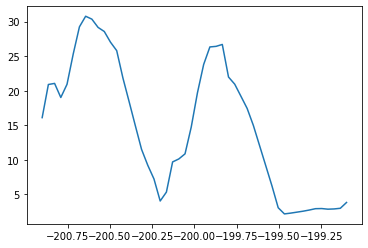

In [30]:
v0Arr=np.linspace(-199.1,-200.9,num=50)
meanList=[]
for v0 in v0Arr:
    def wrap(y,z):
        #v0=-200.0
        return func(0.0,0.0,v0,y,z)

    bounds=np.asarray([(-1.0,1.0),(-1.0,1.0)])*5
    plotxArr=np.linspace(bounds[0][0],bounds[0][1],num=100)
    plotyArr = np.linspace(bounds[1][0], bounds[1][1], num=100)
    image=np.empty((plotxArr.shape[0],plotyArr.shape[0]))
    for i in range(plotxArr.shape[0]):
        for j in range(plotyArr.shape[0]):
            image[j,i]=wrap(plotxArr[i],plotyArr[j])

    image=np.flip(image,axis=0)
    extent=[bounds[0][0],bounds[0][1],bounds[1][0],bounds[1][1]]
    meanList.append(np.nanmean(image))
    #print(v0,np.nanmean(image),np.nanmax(image),np.nanmin(image))
    #plt.imshow(image,extent=extent)
    #plt.show()
plt.plot(v0Arr,meanList)

In [6]:
(3**4/500)**.25

0.6344227580643385